In [2]:
 # This code imports Colab’s upload tool and lets you manually upload files into your notebook for use.

from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


This code imports Pandas for data handling and NumPy for numerical computations in Python.


In [3]:


import pandas as pd
import numpy as np


This line loads the CSV file into a Pandas DataFrame so you can analyze and work with the dataset in Python.




In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

This code converts the TotalCharges column into numeric values, handles invalid entries by turning them into NaN, and then fills missing values with 0 to avoid errors in analysis

In [5]:
# df.drop(columns=['customerID'], inplace=True) # customerID not found in DataFrame

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill any NaN values that resulted from the conversion (e.g., empty strings) with 0 or the mean/median
df['TotalCharges'] = df['TotalCharges'].fillna(0) # Or df['TotalCharges'].mean() if appropriate

This code imports data analysis and visualization libraries, then prints the dataset’s first rows, size, data types, summary statistics, and column names for basic exploration.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean data
# Basic info
print(df.head())          # First 5 rows
print(df.shape)           # Size
print(df.info())          # Data types
print(df.describe())      # Statistics
print(df.columns)         # Column names

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

This code converts TotalCharges into numeric form, counts missing values created during conversion, and removes rows with missing TotalCharges to keep the dataset clean.

In [10]:
# Convert 'TotalCharges' to numeric.
# 'errors=coerce' turns any text it can't handle into NaN (empty)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many values are missing after conversion
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Drop the few rows with missing values (usually only 11 rows) to keep data clean
df.dropna(subset=['TotalCharges'], inplace=True)

Missing values in TotalCharges: 0


This code creates a pie chart showing the percentage distribution of customers who churned versus those who did not.


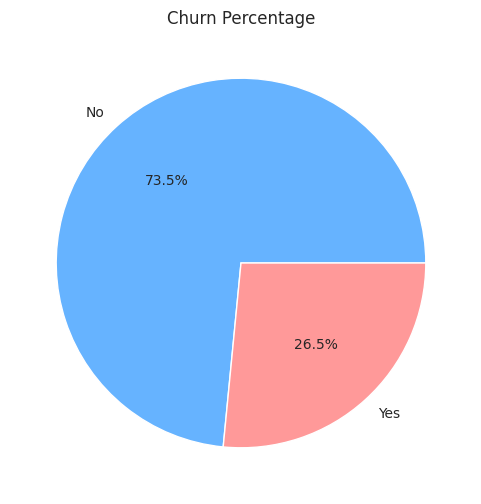

In [11]:
# Set the plot size
plt.figure(figsize=(6, 6))

# Create a pie chart
counts = df['Churn'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])

plt.title('Churn Percentage')
plt.show()

This code plots the tenure distribution of customers, comparing churned vs non-churned groups to see if newer customers are more likely to leave.


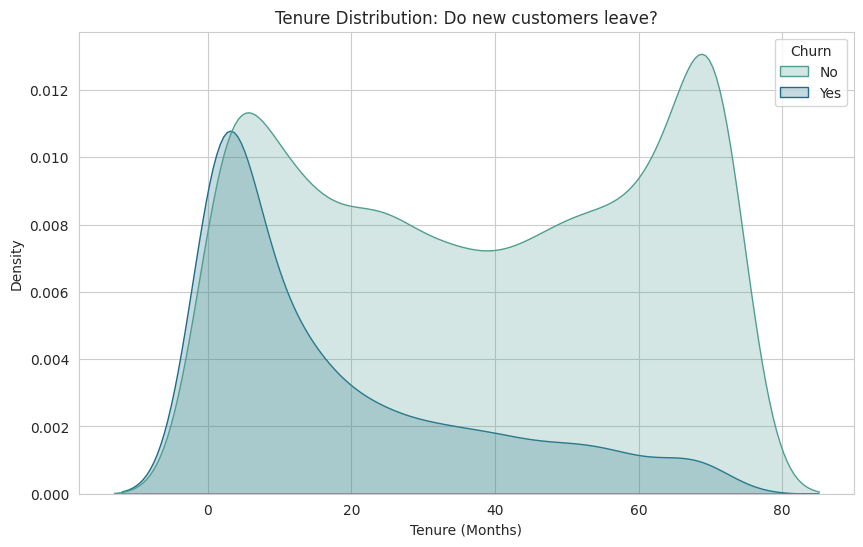

In [12]:
plt.figure(figsize=(10, 6))

# Draw the distribution of Tenure, separated by Churn status
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True, palette="crest")

plt.title('Tenure Distribution: Do new customers leave?')
plt.xlabel('Tenure (Months)')
plt.show()

This code creates a bar chart showing how churn varies across different contract types by comparing churned and non-churned customer counts.


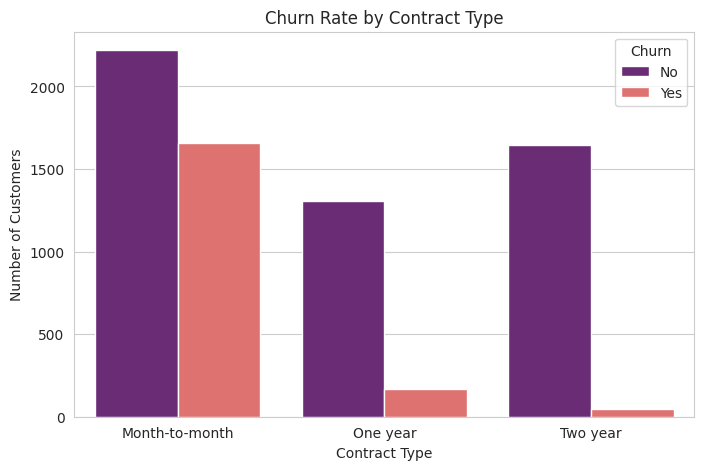

In [13]:
plt.figure(figsize=(8, 5))

# Create a bar chart for Contract types split by Churn
sns.countplot(data=df, x='Contract', hue='Churn', palette='magma')

plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

This code converts the `Churn` column into numeric form, selects only numerical features, and plots a correlation heatmap to show relationships between variables.


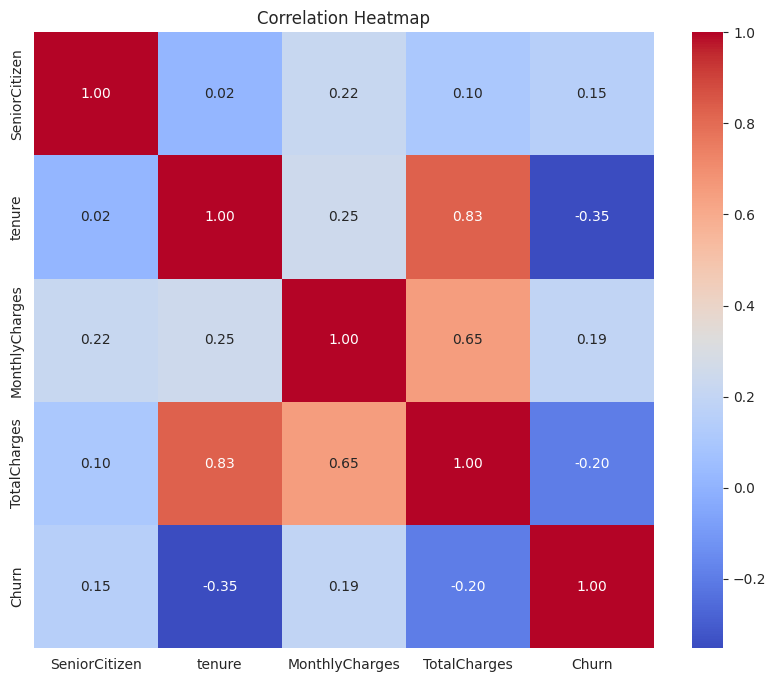

In [14]:
# Create a copy so we don't mess up the original data
df_corr = df.copy()

# Convert Churn to 1 (Yes) and 0 (No)
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only number columns
numeric_data = df_corr.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

This code removes the customerID column since it’s not useful for prediction, then prints the remaining feature column

In [15]:
# Drop customerID because it is not a feature
# 'axis=1' means we are dropping a column, not a row
df.drop('customerID', axis=1, inplace=True)

print("Columns remaining:", df.columns)

Columns remaining: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


his code converts categorical Yes/No and gender columns into binary numeric values (1 and 0) so the dataset is ready for machine learning models.

In [16]:
# List of columns that have only two values (Yes/No)
# We handle Gender manually
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Automatically convert other Yes/No columns
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print("Binary columns converted. Example data:")
display(df[yes_no_columns].head())

Binary columns converted. Example data:


,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


This block reloads the original dataset, cleans and fixes missing values, converts binary categorical columns into numbers, and then applies one-hot encoding to prepare all features properly for machine learning.


In [36]:
# --- RESTART & FIX BLOCK ---

# 1. Reload the data (Bring back the lost columns)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Redo the basic cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop('customerID', axis=1, inplace=True)

# 3. Redo the Yes/No mapping
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 4. NOW run the One-Hot Encoding (This will work now)
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies', 'Contract',
                                 'PaymentMethod'], drop_first=True)

print("Success! One-Hot Encoding is finished.")
print("Current columns:", df.columns)


Success! One-Hot Encoding is finished.
Current columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Scale the numbers (0 to 1)
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# 2. Split the data (80% Train, 20% Test)
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Success! Data split complete.")
print(f"Training Data Shape: {X_train.shape}")

Success! Data split complete.
Training Data Shape: (5625, 30)


This code uses MinMaxScaler to normalize the `tenure`, `MonthlyCharges`, and `TotalCharges` columns so their values fall between 0 and 1, improving machine learning model performance.


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns we want to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Scaling complete. Check that values are between 0 and 1:")
display(df[cols_to_scale].head())

Scaling complete. Check that values are between 0 and 1:


,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


This code separates features (X) and target (y), then splits the dataset into training and testing sets so the model can be trained and evaluated properly.


In [19]:
from sklearn.model_selection import train_test_split

# X is the data (Inputs) - Everything except 'Churn'
X = df.drop('Churn', axis=1)

# y is the answer (Output) - Only 'Churn'
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training shapes: X_train: (5634, 30), y_train: (5634,)
Testing shapes: X_test: (1409, 30), y_test: (1409,)


 phase 2 & 3 : Scaling the numbers and Splitting the data

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# --- STEP 4: SCALE NUMERICAL COLUMNS ---
# We scale these so 'TotalCharges' (e.g., 8000) doesn't overpower 'tenure' (e.g., 5)
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Scaling complete. Values are now between 0 and 1.")

# --- STEP 5: SPLIT INTO TRAIN AND TEST ---
# X = The data (Questions)
X = df.drop('Churn', axis=1)

# y = The target (Answer)
y = df['Churn']

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data successfully split!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Scaling complete. Values are now between 0 and 1.
Data successfully split!
Training Data Shape: (5625, 30)
Testing Data Shape: (1407, 30)


Phase 4: Building and Evaluating the Model.

In [38]:
# Step 1: Train the Model
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model (The AI learns here)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


This code uses the trained model to predict churn on the test data and then compares the first 10 predicted results with the actual churn values.


In [39]:
#Step 2: Make Predictions

# Ask the model to predict the test set
y_pred = model.predict(X_test)

# Show the first 10 predictions vs the actual values
print("Predictions:", y_pred[:10])
print("Actual values:", y_test[:10].values)

Predictions: [0 0 1 0 0 0 0 1 0 0]
Actual values: [0 0 1 0 0 0 0 0 0 0]


This code imports evaluation metrics like confusion matrix and classification report to measure how well the model performed on predicting churn.


In [40]:
# Step 3: Evaluation (The Report Card)

from sklearn.metrics import confusion_matrix, classification_report

# Print the detailed report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



This code creates and visualizes a confusion matrix heatmap to show how many churn predictions were correct and where the model made mistakes.


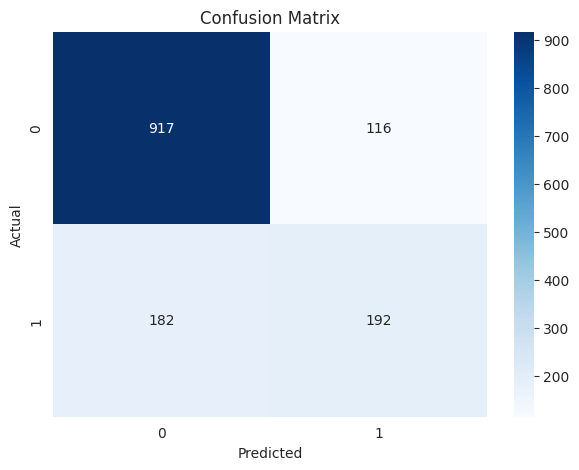

In [41]:
# Step 4: The Confusion Matrix (Visualizing Mistakes)
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Phase 5: Advanced Modeling & Tuning

In [42]:
# Install the library if you haven't (run this in a separate cell if needed)
# !pip install imbalanced-learn xgboost

from imblearn.over_sampling import SMOTE

# 1. Initialize SMOTE
smote = SMOTE(random_state=42)

# 2. Apply it ONLY to the Training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Check the difference
print("Original Churn counts:", y_train.value_counts())
print("SMOTE Churn counts:", y_train_smote.value_counts())

Original Churn counts: Churn
0    4130
1    1495
Name: count, dtype: int64
SMOTE Churn counts: Churn
1    4130
0    4130
Name: count, dtype: int64


This code uses SMOTE to balance the churn classes in the training data, trains a Random Forest model on the balanced dataset, predicts churn on the test set, and evaluates performance using a classification report and confusion matrix.


Fixing class imbalance with SMOTE...
Original Churn counts: Churn
0    4130
1    1495
Name: count, dtype: int64
SMOTE Churn counts: Churn
1    4130
0    4130
Name: count, dtype: int64
Training Random Forest Model (this may take a moment)...

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



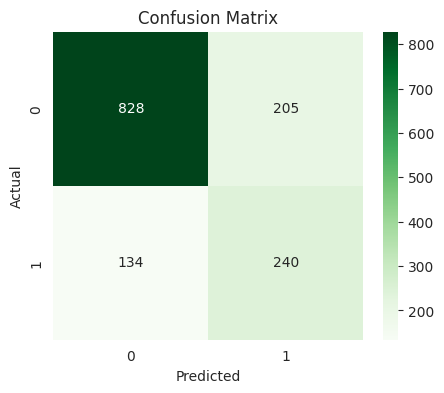

In [55]:
# --- PHASE 5: HANDLING IMBALANCE (SMOTE) & TRAINING RANDOM FOREST ---

# 1. Install imbalanced-learn (Run this line if you haven't installed it yet)
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Fix the Imbalance (Make Churn/No-Churn equal in training)
print("Fixing class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original Churn counts: {y_train.value_counts()}")
print(f"SMOTE Churn counts: {y_train_smote.value_counts()}")
# (You should see equal numbers now)

# 3. Train the Random Forest Model
print("Training Random Forest Model (this may take a moment)...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# 4. Predict on the Test Data (The Exam)
y_pred = rf_model.predict(X_test)

# 5. Show the Results
print("\n=== Random Forest Report ===")
print(classification_report(y_test, y_pred))

# Show Confusion Matrix (Visual)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

This code trains a Random Forest model on SMOTE-balanced training data, predicts churn on the real test set, prints performance metrics, and visualizes the results using a confusion matrix heatmap.


=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



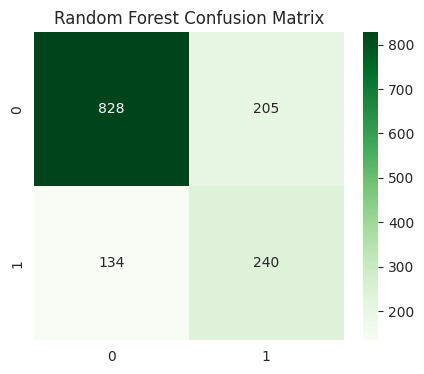

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Initialize the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train on the BALANCED (SMOTE) data
rf_model.fit(X_train_smote, y_train_smote)

# 3. Predict on the REAL (Test) data
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate
print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))

# Optional: Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

This code initializes an XGBoost classifier, trains it on SMOTE-balanced data, predicts churn on the test set, and prints a classification report to evaluate its performance.


In [44]:
from xgboost import XGBClassifier

# 1. Initialize XGBoost
# use_label_encoder=False prevents a warning message
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Train on SMOTE data
xgb_model.fit(X_train_smote, y_train_smote)

# 3. Predict
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate
print("=== XGBoost Report ===")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:15:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Report ===
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1407
   macro avg       0.71      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407



# Phase 6: Feature Importance (Explainability).



This code calculates and visualizes the most important features influencing churn by extracting importance scores from the trained Random Forest model and plotting the top drivers.




Top 10 Drivers of Churn:
                           Feature  Importance
4                           tenure    0.175971
8                     TotalCharges    0.172444
7                   MonthlyCharges    0.148451
11     InternetService_Fiber optic    0.047729
28  PaymentMethod_Electronic check    0.046279
26               Contract_Two year    0.044371
25               Contract_One year    0.028527
0                           gender    0.026502
14              OnlineSecurity_Yes    0.023311
6                 PaperlessBilling    0.022657


/tmp/ipython-input-78948444.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')


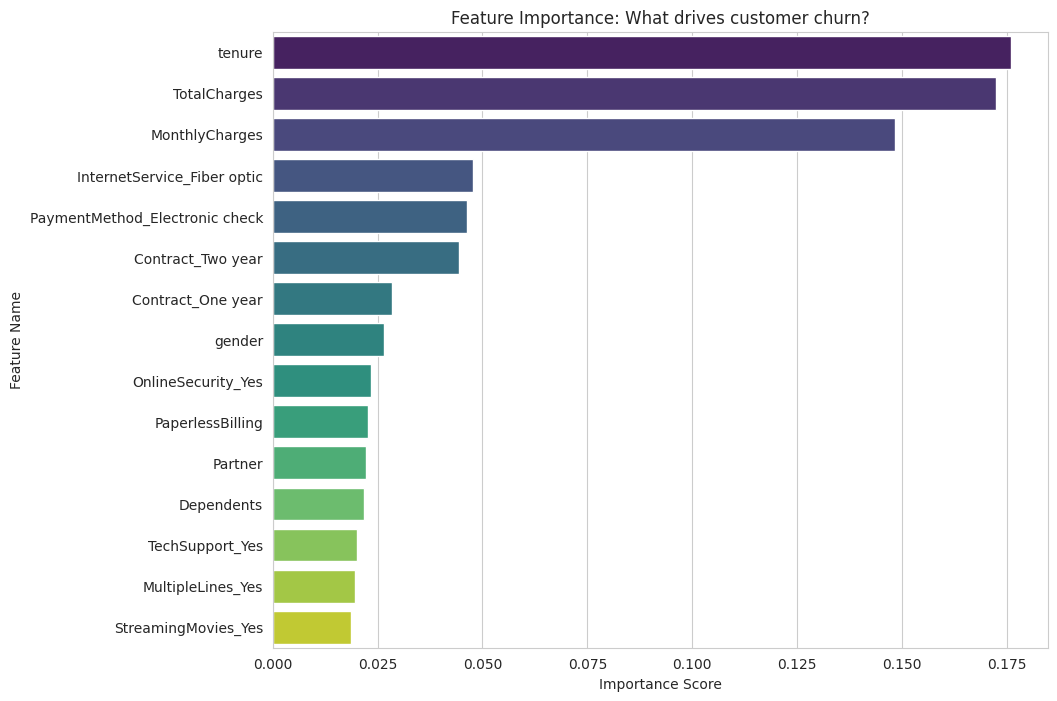

In [45]:
 #Step 1: Extract & Visualize Feature Importance



# Create a dataframe to store features and their importance scores
# Note: If you used XGBoost, change 'rf_model' to 'xgb_model' below
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort the features by importance (highest on top)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Drivers of Churn:")
print(feature_importance.head(10))

# Visualize it
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')

plt.title('Feature Importance: What drives customer churn?')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

This code saves the trained churn prediction model and the scaler into files using Joblib so they can be reused later for real-world predictions without retraining.



In [46]:
 # Step 1: Save the Model to a File
 import joblib

# 1. Save the Model (Assuming 'rf_model' was your best one)
# If you used XGBoost, change 'rf_model' to 'xgb_model'
joblib.dump(rf_model, 'churn_model.pkl')

# 2. Save the Scaler (CRITICAL step often forgotten)
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


This code loads the previously saved churn prediction model and scaler files so they can be used again for making predictions in a real-world deployment scenario.



In [47]:
# Step 2: Load the Model (Simulating a Real-World Scenario)
# Load the saved files
loaded_model = joblib.load('churn_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

print("Model loaded and ready to predict.")


Model loaded and ready to predict.


This code takes a sample customer from the test set, uses the loaded model to predict whether they will churn or stay, and prints the prediction along with the model’s confidence percentage.


In [48]:
 # Step 3: Predict for a New Customer
# Let's create a fake new customer
# We must match the columns used in X_train
# Since X_test is already processed, let's just pick one random row from there to test
new_customer = X_test.iloc[0].values.reshape(1, -1)

# Make a prediction
prediction = loaded_model.predict(new_customer)
probability = loaded_model.predict_proba(new_customer)

# Output the result
if prediction[0] == 1:
    print(f"ALERT: This customer is likely to CHURN.")
    print(f"Confidence: {probability[0][1] * 100:.2f}%")
else:
    print(f"SAFE: This customer is likely to STAY.")
    print(f"Confidence: {probability[0][0] * 100:.2f}%")

SAFE: This customer is likely to STAY.
Confidence: 100.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


This code converts the new customer input into a properly labeled DataFrame matching the training features, then predicts churn and prints the result with confidence, avoiding column mismatch errors.


In [49]:
# 1. Get the column names from your training data
column_names = X.columns

# 2. Convert the new customer array into a DataFrame with these names
new_customer_df = pd.DataFrame(new_customer, columns=column_names)

# 3. Make the prediction using this DataFrame
prediction = loaded_model.predict(new_customer_df)
probability = loaded_model.predict_proba(new_customer_df)

# Output the result
if prediction[0] == 1:
    print(f"ALERT: This customer is likely to CHURN.")
    print(f"Confidence: {probability[0][1] * 100:.2f}%")
else:
    print(f"SAFE: This customer is likely to STAY.")
    print(f"Confidence: {probability[0][0] * 100:.2f}%")

SAFE: This customer is likely to STAY.
Confidence: 100.00%


In [56]:
import random

# --- CUSTOMER DASHBOARD INTERFACE ---

# 1. Pick a RANDOM customer from the test data
random_index = random.randint(0, len(X_test) - 1)
customer_data = X_test.iloc[random_index].to_frame().T

# 2. Get the "Human Readable" numbers for the dashboard
# (We look at the scaled values, usually 0.1 means low, 0.9 means high)
tenure_score = customer_data['tenure'].values[0]
monthly_bill = customer_data['MonthlyCharges'].values[0]

# 3. Ask the AI Model to Predict
prediction = rf_model.predict(customer_data)
probability = rf_model.predict_proba(customer_data)
churn_prob = probability[0][1] * 100  # Probability of leaving

# --- 4. DISPLAY THE INTERFACE ---
print("==========================================")
print(f"👤  CUSTOMER ID: #{random_index}")
print("==========================================")
print(f"📅  Tenure Score:      {tenure_score:.2f}  (0=New, 1=Long-term)")
print(f"💰  Monthly Bill Score: {monthly_bill:.2f}  (0=Low, 1=High)")
print("------------------------------------------")

if prediction[0] == 1:
    print(f"🚨  AI DECISION:  CHURN (High Risk)")
    print(f"📊  Confidence:   {churn_prob:.1f}% sure they will leave.")
    print("💡  RECOMMENDATION: Offer them a discount immediately!")
else:
    print(f"✅  AI DECISION:  SAFE (Loyal Customer)")
    print(f"📊  Confidence:   {100 - churn_prob:.1f}% sure they will stay.")
    print("💡  RECOMMENDATION: No action needed.")

print("==========================================")

👤  CUSTOMER ID: #23
📅  Tenure Score:      0.63  (0=New, 1=Long-term)
💰  Monthly Bill Score: 0.80  (0=Low, 1=High)
------------------------------------------
🚨  AI DECISION:  CHURN (High Risk)
📊  Confidence:   99.0% sure they will leave.
💡  RECOMMENDATION: Offer them a discount immediately!
